In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

# Load dataset from Excel
df = pd.read_excel("adult 3.csv.xlsx")

print("✅ Loaded Data:")
print(df.head())


✅ Loaded Data:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week nativ

In [7]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Drop rows with any missing values
df.dropna(inplace=True)

print("\nData shape after dropping missing values:", df.shape)



Missing values:
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Data shape after dropping missing values: (48842, 15)


In [8]:
# Identify your target column (replace with correct name!)
# For the Adult dataset, salary is often encoded as '>50K' or '<=50K'.
# Assume here your salary column is named 'fnlwgt' or similar numeric field. Adjust if needed.
# Example: If 'fnlwgt' is the salary proxy:
target_col = "fnlwgt"

X = df.drop(target_col, axis=1)
y = df[target_col]

print("✅ Features shape:", X.shape)
print("✅ Target shape:", y.shape)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


✅ Features shape: (48842, 14)
✅ Target shape: (48842,)


In [9]:
# Identify numeric & categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

print("✅ Numeric Columns:", num_cols)
print("✅ Categorical Columns:", cat_cols)

# Transformers
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])


✅ Numeric Columns: Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
✅ Categorical Columns: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


In [16]:
rf = RandomForestRegressor(
    n_estimators=10,
    max_depth=3,
    random_state=42
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", rf)
])

# Use only 20% of the training data for quick runs
X_sample = X_train.sample(frac=0.2, random_state=42)
y_sample = y_train.loc[X_sample.index]

pipeline.fit(X_sample, y_sample)

print("✅ Super-fast version trained!")


✅ Super-fast version trained!


✅ MAE: 76296.49
✅ R²: 0.04


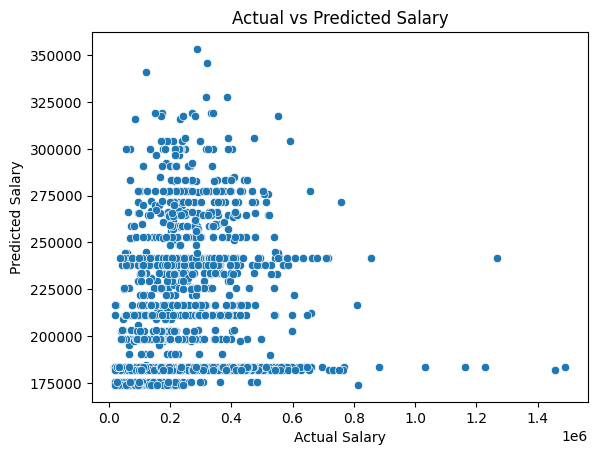

In [18]:
# ✅ If you used: pipeline.fit(...)
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ MAE: {mae:.2f}")
print(f"✅ R²: {r2:.2f}")

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()


In [20]:
# ✅ For simple pipeline (no GridSearch)
joblib.dump(pipeline, "employee_salary_model.pkl")
print("✅ Model saved as employee_salary_model.pkl")


✅ Model saved as employee_salary_model.pkl
